Project 6 - Review of per State Car Crash Data 

By: Edgar Suarez 
October 5, 2024

This project will analyze car crash fatality data per state. It will compare how many fatality car crashes per state, whether caused by alcohol, speeding, or non-distracted drivers.  

The project will then compare how insurance premiums and losses compare on a per state basis. 

The goal is present actionable findings in a easy to understand visuals. 

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np  

Data Acquisition

In [42]:
# Load the Car Crashes dataset into DataFrame
df = sns.load_dataset('car_crashes')

print(df.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


Change 'Column' to 'State'

Changing the Column Abbrev to State was done to facilitate understanding the data. 

In [43]:
# Change the 'abbrev' column to 'State'
df.rename(columns={'abbrev': 'State'}, inplace=True)

Initial Data Inspection

In [44]:
print(df.head())
print(df.columns)  
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses State  
0      145.08    AL  
1      133.93    AK  
2      110.35    AZ  
3      142.39    AR  
4      165.63    CA  
Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'State'],
      dtype='object')
   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47 

Initial Data Descriptive Statistics

In [45]:
print(df.describe())

           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.894000       10.478000    11.348000   
50%    15.600000   4.608000   4.554000       13.857000    13.775000   
75%    18.500000   6.439000   5.604000       16.140000    16.755000   
max    23.900000   9.450000  10.038000       23.661000    21.280000   

       ins_premium  ins_losses  
count    51.000000   51.000000  
mean    886.957647  134.493137  
std     178.296285   24.835922  
min     641.960000   82.750000  
25%     768.430000  114.645000  
50%     858.970000  136.050000  
75%    1007.945000  151.870000  
max    1301.520000  194.780000  


Initial Data Distribution of Categorical Columns

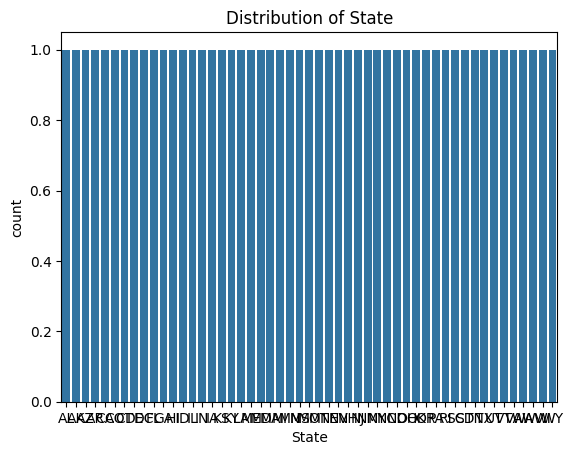

In [46]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
   
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

plt.show()

Car Crashes by State

Explore how car crash fatalities by State. 

C:\Users\Edgar\AppData\Local\Temp\ipykernel_10884\291071415.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_crashes_sorted, x='State', y='total', palette='viridis')


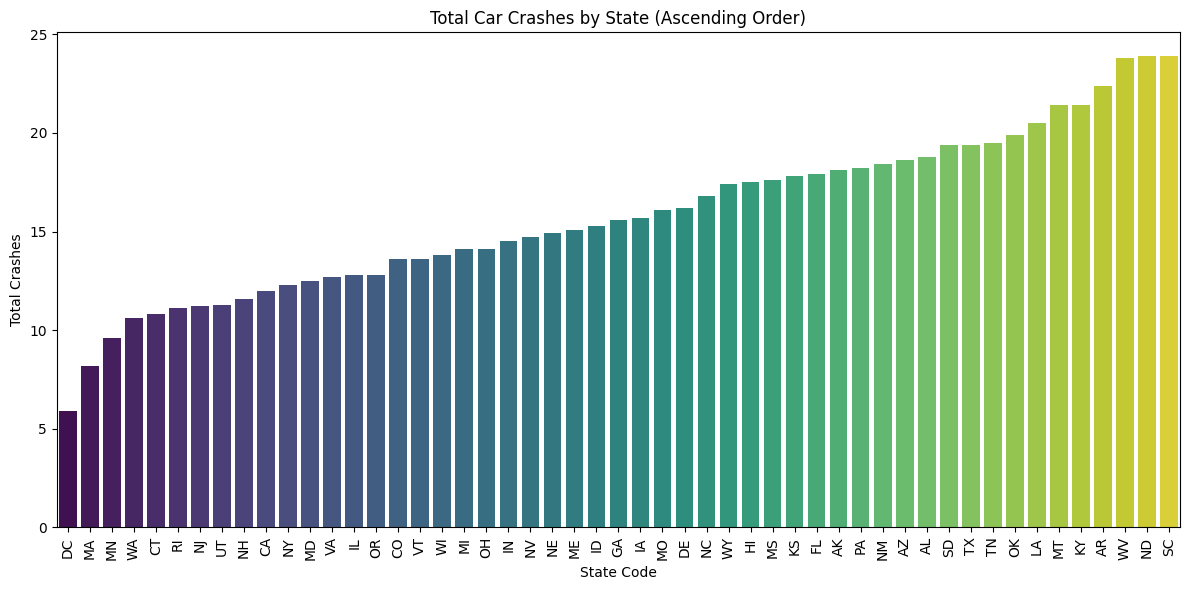

In [47]:
# Group by the correct state-related column (now 'State')
state_crashes = df.groupby('State')['total'].sum().reset_index()

# Sort the results in ascending order
state_crashes_sorted = state_crashes.sort_values(by='total')

plt.figure(figsize=(12, 6))
sns.barplot(data=state_crashes_sorted, x='State', y='total', palette='viridis')
plt.title('Total Car Crashes by State (Ascending Order)')
plt.xlabel('State Code')
plt.ylabel('Total Crashes')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

The Total Car Crash by State graph shows where the majority of crashes are taking place. The top 5 states affected are South Carolina, North Dakota, West Virginia, Arkansas, and Kentucky. It is notable that these states are not the most populace in the country. Fatalities may be related to ambulatory response time or lack of safety road infrastructure. More data will be needed to confirm reasoning. 

Insurance Premiums by State

Explore how Insurance Premiums compare on a per State basis. 

C:\Users\Edgar\AppData\Local\Temp\ipykernel_10884\725738032.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_premiums_sorted, x='State', y='ins_premium', palette='viridis')


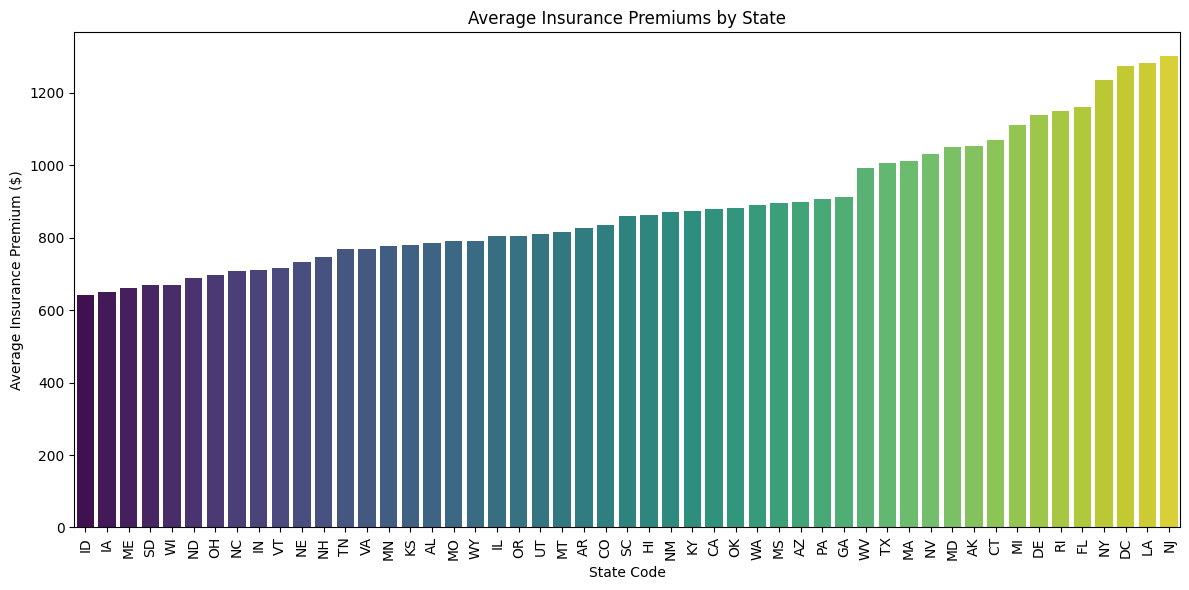

In [48]:
# Group by state abbreviation and calculate the average insurance premium
state_premiums = df.groupby('State')['ins_premium'].mean().reset_index()

# Sort the results in ascending order
state_premiums_sorted = state_premiums.sort_values(by='ins_premium')

plt.figure(figsize=(12, 6))
sns.barplot(data=state_premiums_sorted, x='State', y='ins_premium', palette='viridis')
plt.title('Average Insurance Premiums by State')
plt.xlabel('State Code')
plt.ylabel('Average Insurance Premium ($)')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

The Average Insurance Premiums by State graph shows that number of fatality car crashes are not indicative of where premiums will land for state. New York and New Jersey are below national average on car crash fatalities but carry among the top 5 highest insurance premiums. Premiums are more likely  affected by total non-fatality collisions. 

   State  total_crashes  average_premium
0     AK           18.1          1053.48
1     AL           18.8           784.55
2     AR           22.4           827.34
3     AZ           18.6           899.47
4     CA           12.0           878.41
5     CO           13.6           835.50
6     CT           10.8          1068.73
7     DC            5.9          1273.89
8     DE           16.2          1137.87
9     FL           17.9          1160.13
10    GA           15.6           913.15
11    HI           17.5           861.18
12    IA           15.7           649.06
13    ID           15.3           641.96
14    IL           12.8           803.11
15    IN           14.5           710.46
16    KS           17.8           780.45
17    KY           21.4           872.51
18    LA           20.5          1281.55
19    MA            8.2          1011.14
20    MD           12.5          1048.78
21    ME           15.1           661.88
22    MI           14.1          1110.61
23    MN        

C:\Users\Edgar\AppData\Local\Temp\ipykernel_10884\1408193672.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=state_totals, x='total_crashes', y='average_premium', palette='viridis', s=100)


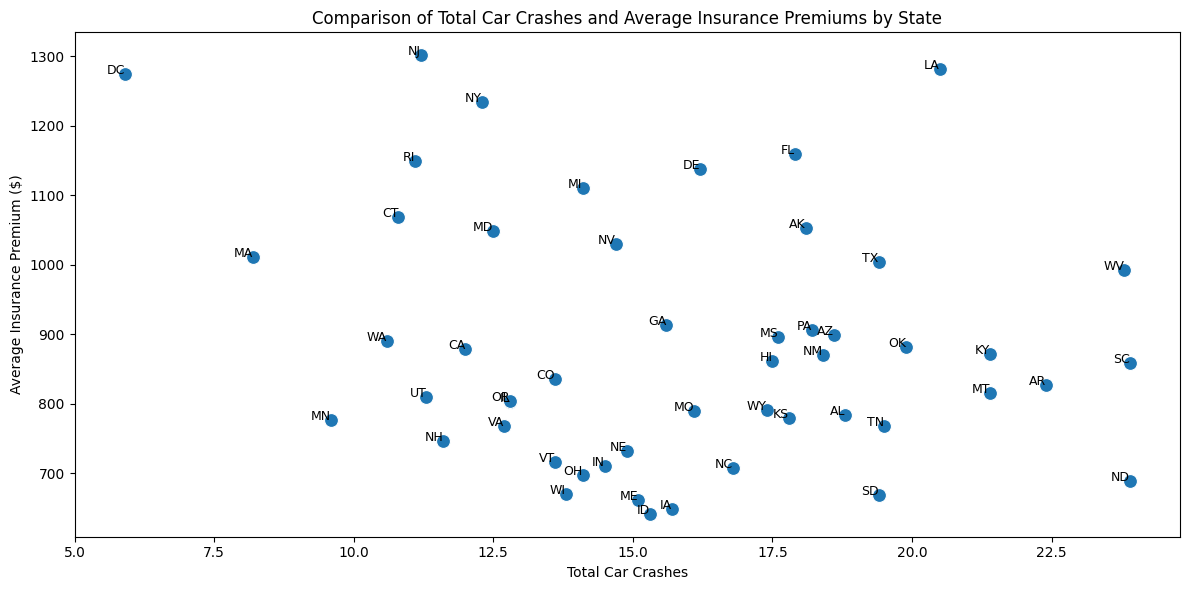

In [49]:
# Group by state abbreviation to calculate total crashes and average insurance premium
state_totals = df.groupby('State').agg(total_crashes=('total', 'sum'), average_premium=('ins_premium', 'mean')).reset_index()

# Display the resulting DataFrame
print(state_totals)


plt.figure(figsize=(12, 6))
sns.scatterplot(data=state_totals, x='total_crashes', y='average_premium', palette='viridis', s=100)
plt.title('Comparison of Total Car Crashes and Average Insurance Premiums by State')
plt.xlabel('Total Car Crashes')
plt.ylabel('Average Insurance Premium ($)')

for i in range(state_totals.shape[0]):
    plt.annotate(state_totals['State'][i],
                 (state_totals['total_crashes'][i], state_totals['average_premium'][i]),
                 fontsize=9,
                 ha='right')

plt.tight_layout()  
plt.show()

The Comparison of Total Car Crashes and Average Insurance Premiums by State, further support that amount of fatality car crashes are not indicated of how much in premiums will be charged. 

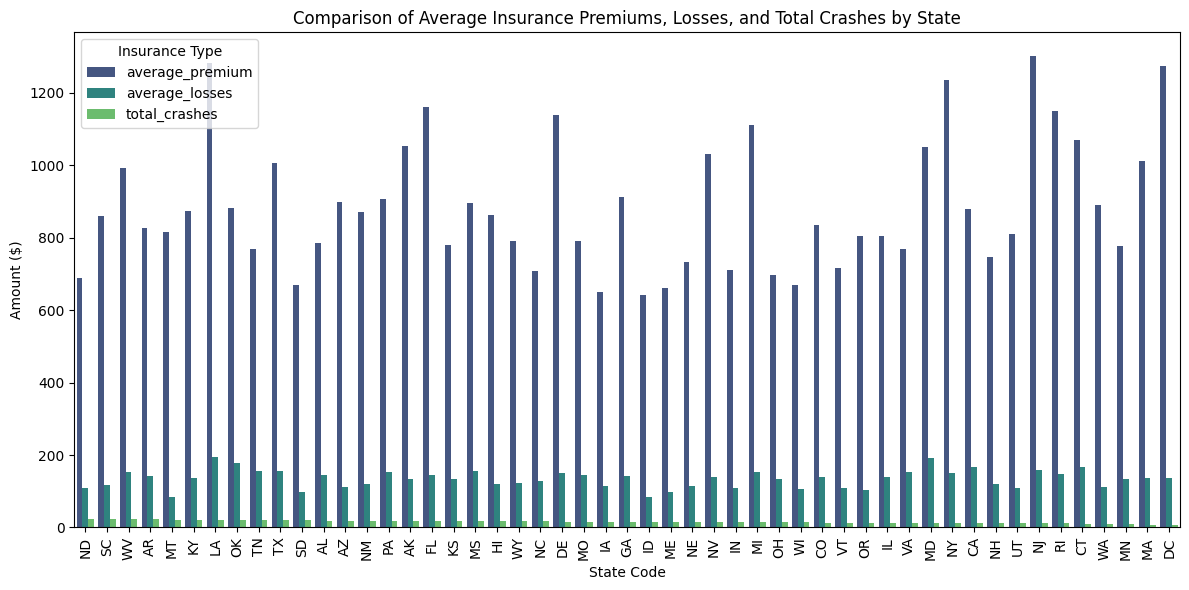

In [50]:
# Group by 'State' to calculate average insurance premium, losses, and total crashes
state_insurance_total = df.groupby('State').agg(
    average_premium=('ins_premium', 'mean'),
    average_losses=('ins_losses', 'mean'),
    total_crashes=('total', 'sum')
).reset_index()

# Sort by total_crashes in descending order
state_insurance_total_sorted = state_insurance_total.sort_values(by='total_crashes', ascending=False)

state_insurance_total_melted = state_insurance_total_sorted.melt(
    id_vars='State', 
    value_vars=['average_premium', 'average_losses', 'total_crashes'],
    var_name='Insurance Type', 
    value_name='Amount'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=state_insurance_total_melted, x='State', y='Amount', hue='Insurance Type', palette='viridis')
plt.title('Comparison of Average Insurance Premiums, Losses, and Total Crashes by State')
plt.xlabel('State Code')
plt.ylabel('Amount ($)')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.legend(title='Insurance Type')
plt.show()

Comparison of Average Insurance Premiums, Losses, and Totals Crashes by State further supports that total car crashes are not indicative of total insurance losses, and therefore, insurance premiums. 

In [51]:
# Calculate the insurance difference and add it to the DataFrame
df['ins_difference'] = df['ins_premium'] - df['ins_losses']

# Display the updated DataFrame with the new column
print(df[['State', 'ins_premium', 'ins_losses', 'ins_difference']].head())

  State  ins_premium  ins_losses  ins_difference
0    AL       784.55      145.08          639.47
1    AK      1053.48      133.93          919.55
2    AZ       899.47      110.35          789.12
3    AR       827.34      142.39          684.95
4    CA       878.41      165.63          712.78


Adding the Ins_Difference Columns will provide reference for insurance losses compared to Insurance Premiums. 

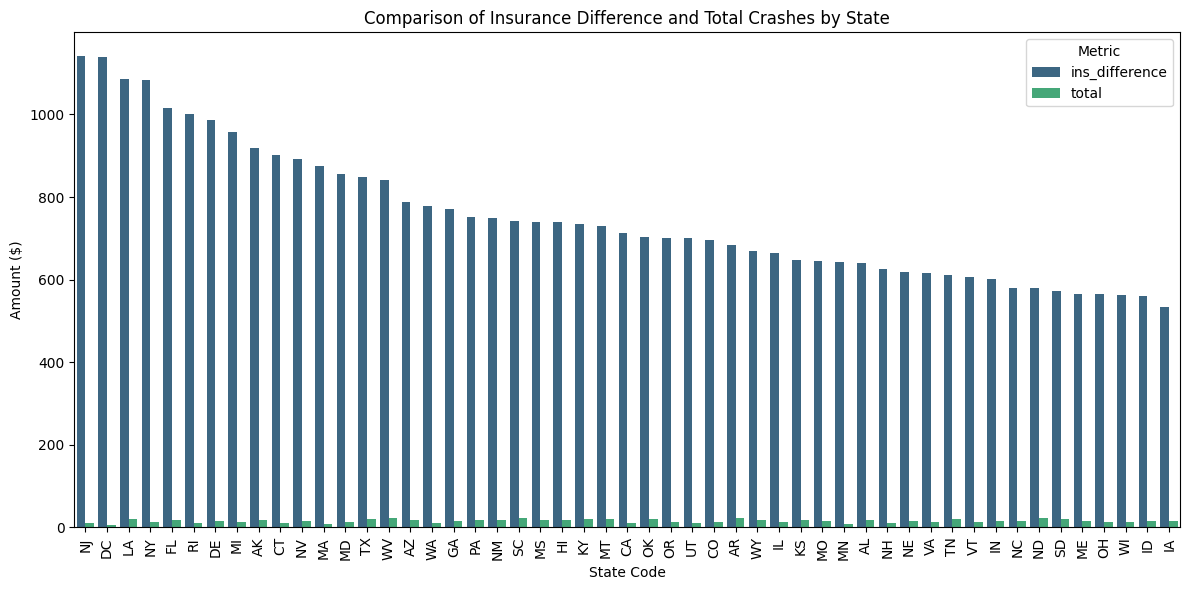

In [52]:
# Calculate the insurance difference
df['ins_difference'] = df['ins_premium'] - df['ins_losses']

comparison_df = df[['State', 'ins_difference', 'total']]

comparison_melted = comparison_df.melt(
    id_vars='State',
    value_vars=['ins_difference', 'total'],
    var_name='Metric',
    value_name='Amount'
)

# Sort the DataFrame by 'ins_difference' in descending order
comparison_melted_sorted = comparison_melted.sort_values(by='Amount', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_melted_sorted, x='State', y='Amount', hue='Metric', palette='viridis')
plt.title('Comparison of Insurance Difference and Total Crashes by State')
plt.xlabel('State Code')
plt.ylabel('Amount ($)')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.legend(title='Metric')
plt.show()

The above graph shows the more profitable states in reference to the difference of insurance premiums less insurance losses. Here we can no noticeable difference in premiums losses against premiums based on total car crashes. 

Distribution of variables (Speeding, Alcohol, Non-Distracted Drivers) for Car Crash Fatalities

The goal of this exploration is to find how many fatalities are caused or were contributed by Speeding and Alcohol. 

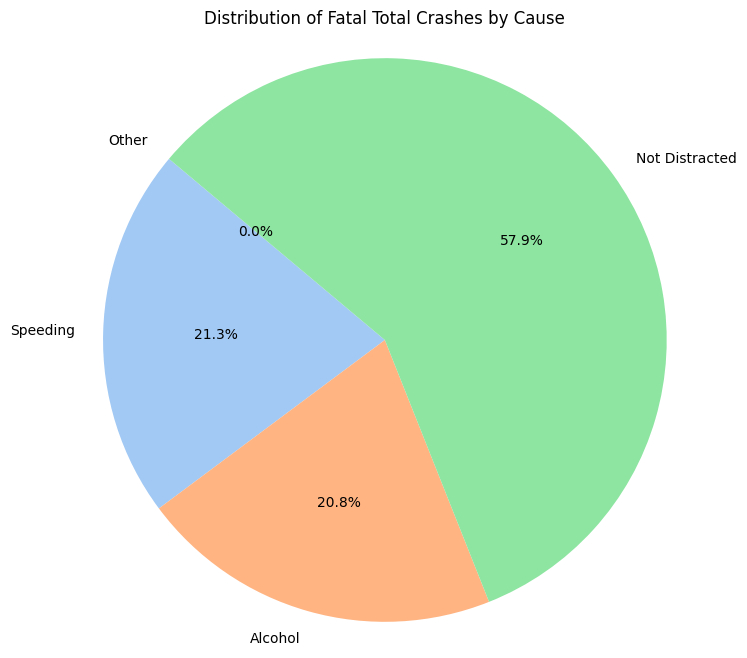

In [53]:
# Calculate the total counts for each cause
total_crashes = df['total'].sum()
total_speeding = df['speeding'].sum()
total_alcohol = df['alcohol'].sum()
total_not_distracted = df['not_distracted'].sum()

# Create a new DataFrame for the pie chart
pie_data = pd.DataFrame({
    'Cause': ['Speeding', 'Alcohol', 'Not Distracted'],
    'Count': [total_speeding, total_alcohol, total_not_distracted]
})

# Calculate the remaining crashes and add as a new row
other_count = total_crashes - (total_speeding + total_alcohol + total_not_distracted)

# Ensure other_count is non-negative
other_count = max(other_count, 0)  # Set to 0 if negative
other_data = pd.DataFrame({'Cause': ['Other'], 'Count': [other_count]})

# Concatenate the DataFrames
pie_data = pd.concat([pie_data, other_data], ignore_index=True)

plt.figure(figsize=(8, 8))
plt.pie(pie_data['Count'], labels=pie_data['Cause'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Fatal Total Crashes by Cause')
plt.axis('equal')  
plt.show()

Distribution of Fatal Car Crashes shows the percentage of fatalities caused by alcohol and speedings. 

In Summary, we've explored car crash data which compares how many fatality car crashes per state, whether caused by alcohol, speeding, or non-distracted drivers. The data has shown that a large population is not an indication of amount of fatal car crashes. Rather, it appears that rural locations may be at a higher risk for these fatalities. 

Moreover, car crash fatalities do not appear to be a significant indicator of insurance losses and, as a result, insurance premiums. 